# Preprocessing and analysis of INEGI dataset focusing on Morelos and the variable PSINDER with the KDD model


# ![title](KDD_process.png)

In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv("conjunto_de_datos_iter_17CSV20.csv")

In [3]:
df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,17,Morelos,0,Total de la entidad Morelos,0,Total de la Entidad,NaN,NaN,NaN,1971520,...,499787,307830,222853,90825,48209,24696,34950,227132,7724,*
1,17,Morelos,0,Total de la entidad Morelos,9998,Localidades de una vivienda,NaN,NaN,NaN,1382,...,145,40,35,2,3,39,27,130,18,*
2,17,Morelos,0,Total de la entidad Morelos,9999,Localidades de dos viviendas,NaN,NaN,NaN,603,...,150,30,30,5,0,35,27,144,16,*
3,17,Morelos,1,Amacuzac,0,Total del Municipio,NaN,NaN,NaN,17598,...,4056,1919,1833,277,130,454,570,2895,175,*
4,17,Morelos,1,Amacuzac,1,Amacuzac,"99°22'10.251"" W","18°36'00.006"" N",900.0,5575,...,1442,811,835,164,80,90,83,741,22,6


In [4]:
df.isnull().sum()

ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 286, dtype: int64

In [5]:
df.isna().sum()

ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 286, dtype: int64

In [6]:
df.shape

(1678, 286)

# Starting to preprocess

#### After reviewing the dataset with excel to see a better insight, there are a lot of values as * values that need to be cleaned since they do not apport any important information 

In [7]:
df = df[df != "*"]
df.dropna().reset_index(drop = True)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,17,Morelos,1,Amacuzac,1,Amacuzac,"99°22'10.251"" W","18°36'00.006"" N",900.0,5575,...,1442,811,835,164,80,90,83,741,22,6
1,17,Morelos,1,Amacuzac,2,Cajones,"99°20'48.128"" W","18°34'33.424"" N",894.0,553,...,122,39,27,3,3,21,19,104,8,3
2,17,Morelos,1,Amacuzac,3,Casahuatlán,"99°23'09.536"" W","18°34'24.213"" N",949.0,1915,...,400,123,72,5,4,67,66,365,19,4
3,17,Morelos,1,Amacuzac,4,Coahuixtla,"99°22'08.736"" W","18°34'26.698"" N",914.0,1151,...,238,99,61,3,3,29,39,200,11,4
4,17,Morelos,1,Amacuzac,5,Huajintlán,"99°25'27.001"" W","18°36'35.101"" N",926.0,1788,...,411,177,219,20,10,40,56,321,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,17,Morelos,36,Hueyapan,7,El Chupamirto,"98°42'54.266"" W","18°51'51.801"" N",2043.0,20,...,4,0,0,0,0,0,0,4,0,1
1304,17,Morelos,36,Hueyapan,9,Las Mesas,"98°43'21.200"" W","18°49'51.235"" N",1963.0,30,...,11,1,1,1,0,4,2,11,2,1
1305,17,Morelos,36,Hueyapan,10,Matlacotla,"98°41'50.894"" W","18°52'11.129"" N",2248.0,45,...,9,1,2,0,1,1,2,10,0,1
1306,17,Morelos,36,Hueyapan,13,Olivar,"98°41'15.080"" W","18°51'38.150"" N",2103.0,78,...,15,2,7,0,0,3,4,17,0,1


In [8]:
df.dtypes

ENTIDAD         int64
NOM_ENT        object
MUN             int64
NOM_MUN        object
LOC             int64
                ...  
VPH_SINRTV     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SINTIC     object
TAMLOC         object
Length: 286, dtype: object

### We can see that there are some values objects, we need to change them to numeric values since with that I am going to be able to preprocess them easily

In [9]:
for col in df.columns:
    try:
        df[col] = df[col].astype(int)
    except ValueError:
        # If ValueError occurs, try converting to float
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            pass
        

### Now we can see that all of them are changed to numeric

In [10]:
df.dtypes

ENTIDAD          int64
NOM_ENT         object
MUN              int64
NOM_MUN         object
LOC              int64
                ...   
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
TAMLOC         float64
Length: 286, dtype: object

In [11]:
df.isnull().sum()

ENTIDAD          0
NOM_ENT          0
MUN              0
NOM_MUN          0
LOC              0
              ... 
VPH_SINRTV     285
VPH_SINLTC     285
VPH_SINCINT    285
VPH_SINTIC     285
TAMLOC         100
Length: 286, dtype: int64

In [12]:
df.isna().sum()

ENTIDAD          0
NOM_ENT          0
MUN              0
NOM_MUN          0
LOC              0
              ... 
VPH_SINRTV     285
VPH_SINLTC     285
VPH_SINCINT    285
VPH_SINTIC     285
TAMLOC         100
Length: 286, dtype: int64

### We check the nulls and nans and there are some, we dropped them since there is no need to change them in other way

In [13]:
dfnonull = df.dropna()
dfnonull.reset_index(drop = True)
dfnonull

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
4,17,Morelos,1,Amacuzac,1,Amacuzac,"99°22'10.251"" W","18°36'00.006"" N",900.0,5575,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0
5,17,Morelos,1,Amacuzac,2,Cajones,"99°20'48.128"" W","18°34'33.424"" N",894.0,553,...,122.0,39.0,27.0,3.0,3.0,21.0,19.0,104.0,8.0,3.0
6,17,Morelos,1,Amacuzac,3,Casahuatlán,"99°23'09.536"" W","18°34'24.213"" N",949.0,1915,...,400.0,123.0,72.0,5.0,4.0,67.0,66.0,365.0,19.0,4.0
7,17,Morelos,1,Amacuzac,4,Coahuixtla,"99°22'08.736"" W","18°34'26.698"" N",914.0,1151,...,238.0,99.0,61.0,3.0,3.0,29.0,39.0,200.0,11.0,4.0
8,17,Morelos,1,Amacuzac,5,Huajintlán,"99°25'27.001"" W","18°36'35.101"" N",926.0,1788,...,411.0,177.0,219.0,20.0,10.0,40.0,56.0,321.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,17,Morelos,36,Hueyapan,7,El Chupamirto,"98°42'54.266"" W","18°51'51.801"" N",2043.0,20,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
1669,17,Morelos,36,Hueyapan,9,Las Mesas,"98°43'21.200"" W","18°49'51.235"" N",1963.0,30,...,11.0,1.0,1.0,1.0,0.0,4.0,2.0,11.0,2.0,1.0
1670,17,Morelos,36,Hueyapan,10,Matlacotla,"98°41'50.894"" W","18°52'11.129"" N",2248.0,45,...,9.0,1.0,2.0,0.0,1.0,1.0,2.0,10.0,0.0,1.0
1671,17,Morelos,36,Hueyapan,13,Olivar,"98°41'15.080"" W","18°51'38.150"" N",2103.0,78,...,15.0,2.0,7.0,0.0,0.0,3.0,4.0,17.0,0.0,1.0


In [14]:
dfnonull.isnull().sum()

ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 286, dtype: int64

In [15]:
dfnonull.isna().sum()


ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 286, dtype: int64

In [16]:
dfnonull.head(100)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
4,17,Morelos,1,Amacuzac,1,Amacuzac,"99°22'10.251"" W","18°36'00.006"" N",900.0,5575,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0
5,17,Morelos,1,Amacuzac,2,Cajones,"99°20'48.128"" W","18°34'33.424"" N",894.0,553,...,122.0,39.0,27.0,3.0,3.0,21.0,19.0,104.0,8.0,3.0
6,17,Morelos,1,Amacuzac,3,Casahuatlán,"99°23'09.536"" W","18°34'24.213"" N",949.0,1915,...,400.0,123.0,72.0,5.0,4.0,67.0,66.0,365.0,19.0,4.0
7,17,Morelos,1,Amacuzac,4,Coahuixtla,"99°22'08.736"" W","18°34'26.698"" N",914.0,1151,...,238.0,99.0,61.0,3.0,3.0,29.0,39.0,200.0,11.0,4.0
8,17,Morelos,1,Amacuzac,5,Huajintlán,"99°25'27.001"" W","18°36'35.101"" N",926.0,1788,...,411.0,177.0,219.0,20.0,10.0,40.0,56.0,321.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,17,Morelos,3,Axochiapan,64,Campo la Laguna,"98°46'16.139"" W","18°30'31.747"" N",1044.0,110,...,27.0,5.0,12.0,1.0,1.0,2.0,2.0,23.0,1.0,1.0
125,17,Morelos,3,Axochiapan,67,Colonia los Tres Reyes,"98°45'37.040"" W","18°30'47.673"" N",1041.0,57,...,12.0,0.0,2.0,0.0,0.0,2.0,0.0,11.0,0.0,1.0
126,17,Morelos,3,Axochiapan,69,El Edén [Rancho],"98°46'17.760"" W","18°30'58.213"" N",1045.0,24,...,5.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,0.0,1.0
128,17,Morelos,3,Axochiapan,73,Campo Jicamal,"98°46'10.275"" W","18°33'31.746"" N",1089.0,183,...,34.0,3.0,4.0,0.0,0.0,3.0,4.0,34.0,1.0,1.0


In [17]:
df.tail(100)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
1578,17,Morelos,32,Zacualpan de Amilpas,0,Total del Municipio,NaN,NaN,NaN,9965,...,2235.0,1050.0,410.0,132.0,81.0,127.0,366.0,1590.0,56.0,NaN
1579,17,Morelos,32,Zacualpan de Amilpas,1,Zacualpan de Amilpas,"98°45'55.523"" W","18°47'03.815"" N",1644.0,3742,...,917.0,518.0,220.0,79.0,44.0,35.0,109.0,531.0,15.0,5.0
1580,17,Morelos,32,Zacualpan de Amilpas,6,Tlacotepec,"98°45'05.805"" W","18°48'51.603"" N",1751.0,5428,...,1133.0,486.0,179.0,50.0,37.0,80.0,230.0,901.0,39.0,6.0
1581,17,Morelos,32,Zacualpan de Amilpas,10,La Presa (El Cerro de la Era),"98°45'11.290"" W","18°48'02.171"" N",1696.0,357,...,73.0,18.0,3.0,0.0,0.0,5.0,16.0,66.0,1.0,2.0
1582,17,Morelos,32,Zacualpan de Amilpas,12,Barranca Amatzinac,"98°45'47.605"" W","18°47'00.645"" N",1645.0,50,...,15.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,17,Morelos,36,Hueyapan,15,Tepetomayo,"98°42'15.446"" W","18°51'20.634"" N",2124.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1674,17,Morelos,36,Hueyapan,17,Tlaquexchpanco,"98°39'54.022"" W","18°53'50.305"" N",2643.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1675,17,Morelos,36,Hueyapan,19,Yiganechxco,"98°40'22.223"" W","18°54'17.252"" N",2577.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1676,17,Morelos,36,Hueyapan,9998,Localidades de una vivienda,NaN,NaN,NaN,11,...,2.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0,NaN


#### We see there are actually still some NaNs


In [18]:
dfnonull.isna().sum().sum()

0

### Create correlation matrix to see the correlation between all variables except the first 8 that has no need to be there

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns




In [20]:
df_sub = dfnonull.iloc[:,110:]
df_sub

,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
4,2.15,4441.0,2305.0,2136.0,1092.0,602.0,490.0,4960.0,2601.0,2359.0,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0
5,2.93,358.0,178.0,180.0,183.0,93.0,90.0,472.0,234.0,238.0,...,122.0,39.0,27.0,3.0,3.0,21.0,19.0,104.0,8.0,3.0
6,3.04,1178.0,585.0,593.0,720.0,399.0,321.0,1635.0,856.0,779.0,...,400.0,123.0,72.0,5.0,4.0,67.0,66.0,365.0,19.0,4.0
7,2.67,864.0,432.0,432.0,275.0,154.0,121.0,1022.0,526.0,496.0,...,238.0,99.0,61.0,3.0,3.0,29.0,39.0,200.0,11.0,4.0
8,2.54,1505.0,769.0,736.0,264.0,145.0,119.0,1603.0,830.0,773.0,...,411.0,177.0,219.0,20.0,10.0,40.0,56.0,321.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,2.43,19.0,10.0,9.0,1.0,1.0,0.0,16.0,8.0,8.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
1669,2.91,24.0,12.0,12.0,2.0,0.0,2.0,26.0,11.0,15.0,...,11.0,1.0,1.0,1.0,0.0,4.0,2.0,11.0,2.0,1.0
1670,2.69,45.0,23.0,22.0,0.0,0.0,0.0,36.0,19.0,17.0,...,9.0,1.0,2.0,0.0,1.0,1.0,2.0,10.0,0.0,1.0
1671,2.67,76.0,37.0,39.0,1.0,1.0,0.0,71.0,35.0,36.0,...,15.0,2.0,7.0,0.0,0.0,3.0,4.0,17.0,0.0,1.0


In [21]:
corr = df_sub.corr()
corr

,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
PROM_HNV,1.000000,-0.042026,-0.042144,-0.041896,-0.041484,-0.041227,-0.041787,-0.041851,-0.041818,-0.041884,...,-0.042436,-0.041983,-0.041419,-0.039503,-0.040750,-0.036705,-0.034599,-0.039181,-0.028959,-0.062328
PNACENT,-0.042026,1.000000,0.999960,0.999954,0.977868,0.976901,0.978854,0.997948,0.997597,0.998243,...,0.993633,0.979579,0.972951,0.939679,0.953448,0.984723,0.960554,0.982448,0.919054,0.490437
PNACENT_F,-0.042144,0.999960,1.000000,0.999829,0.978054,0.977156,0.978957,0.998011,0.997724,0.998235,...,0.993898,0.980260,0.973692,0.940857,0.954350,0.984081,0.959563,0.981570,0.917584,0.487814
PNACENT_M,-0.041896,0.999954,0.999829,1.000000,0.977583,0.976543,0.978658,0.997792,0.997373,0.998163,...,0.993261,0.978765,0.972073,0.938338,0.952401,0.985320,0.961526,0.983298,0.920541,0.493192
PNACOE,-0.041484,0.977868,0.978054,0.977583,1.000000,0.999929,0.999896,0.989170,0.989789,0.988376,...,0.994315,0.995317,0.991944,0.979286,0.988239,0.953634,0.896525,0.937978,0.840617,0.402211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPH_SINRTV,-0.036705,0.984723,0.984081,0.985320,0.953634,0.952120,0.955287,0.979516,0.978391,0.980682,...,0.972042,0.948511,0.942181,0.901371,0.915149,1.000000,0.980988,0.990598,0.957674,0.543099
VPH_SINLTC,-0.034599,0.960554,0.959563,0.961526,0.896525,0.894408,0.898921,0.945327,0.943302,0.947506,...,0.930100,0.895446,0.886510,0.832744,0.849822,0.980988,1.000000,0.985723,0.986384,0.606786
VPH_SINCINT,-0.039181,0.982448,0.981570,0.983298,0.937978,0.935678,0.940587,0.973154,0.971448,0.974974,...,0.961355,0.930162,0.919405,0.869224,0.888961,0.990598,0.985723,1.000000,0.962147,0.562213
VPH_SINTIC,-0.028959,0.919054,0.917584,0.920541,0.840617,0.837737,0.843948,0.899014,0.896192,0.902096,...,0.878757,0.835435,0.824691,0.761432,0.782182,0.957674,0.986384,0.962147,1.000000,0.632790


### I now check the correlation of the whole dataset

In [22]:
df_sub2 = dfnonull.iloc[:,10:]
df_sub2

,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
4,2925.0,2650.0,216.0,118.0,98.0,5359.0,2807.0,2552.0,5140.0,2699.0,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0
5,275.0,278.0,31.0,15.0,16.0,522.0,260.0,262.0,501.0,245.0,...,122.0,39.0,27.0,3.0,3.0,21.0,19.0,104.0,8.0,3.0
6,993.0,922.0,111.0,47.0,64.0,1804.0,946.0,858.0,1716.0,900.0,...,400.0,123.0,72.0,5.0,4.0,67.0,66.0,365.0,19.0,4.0
7,592.0,559.0,52.0,21.0,31.0,1099.0,571.0,528.0,1051.0,545.0,...,238.0,99.0,61.0,3.0,3.0,29.0,39.0,200.0,11.0,4.0
8,922.0,866.0,69.0,43.0,26.0,1719.0,879.0,840.0,1651.0,853.0,...,411.0,177.0,219.0,20.0,10.0,40.0,56.0,321.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,11.0,9.0,3.0,2.0,1.0,17.0,9.0,8.0,17.0,9.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
1669,14.0,16.0,2.0,1.0,1.0,28.0,13.0,15.0,26.0,11.0,...,11.0,1.0,1.0,1.0,0.0,4.0,2.0,11.0,2.0,1.0
1670,23.0,22.0,6.0,3.0,3.0,39.0,20.0,19.0,37.0,19.0,...,9.0,1.0,2.0,0.0,1.0,1.0,2.0,10.0,0.0,1.0
1671,38.0,40.0,5.0,1.0,4.0,73.0,37.0,36.0,72.0,36.0,...,15.0,2.0,7.0,0.0,0.0,3.0,4.0,17.0,0.0,1.0


In [23]:
df_sub2_corr = df_sub2.corr()
df_sub2_corr

,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
POBFEM,1.000000,0.999773,0.995824,0.994394,0.996755,0.999964,0.999993,0.999800,0.999971,0.999982,...,0.999092,0.990683,0.985343,0.959592,0.971305,0.978373,0.942546,0.970961,0.895284,0.460478
POBMAS,0.999773,1.000000,0.996951,0.995698,0.997710,0.999909,0.999712,0.999996,0.999881,0.999666,...,0.998259,0.988326,0.982590,0.955047,0.967618,0.980547,0.946548,0.974374,0.900908,0.468497
P_0A2,0.995824,0.996951,1.000000,0.999761,0.999777,0.996137,0.995478,0.996738,0.995941,0.995279,...,0.991452,0.975678,0.967652,0.932955,0.949337,0.983501,0.957585,0.983947,0.918788,0.495864
P_0A2_F,0.994394,0.995698,0.999761,1.000000,0.999078,0.994747,0.993987,0.995461,0.994524,0.993761,...,0.989497,0.972696,0.964109,0.928035,0.945394,0.982837,0.958596,0.984880,0.921171,0.497713
P_0A2_M,0.996755,0.997710,0.999777,0.999078,1.000000,0.997028,0.996467,0.997521,0.996858,0.996293,...,0.992891,0.978115,0.970635,0.937283,0.952715,0.983696,0.956175,0.982599,0.916072,0.493854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPH_SINRTV,0.978373,0.980547,0.983501,0.982837,0.983696,0.979181,0.978026,0.980337,0.978833,0.977669,...,0.972042,0.948511,0.942181,0.901371,0.915149,1.000000,0.980988,0.990598,0.957674,0.543099
VPH_SINLTC,0.942546,0.946548,0.957585,0.958596,0.956175,0.943882,0.941798,0.946081,0.943284,0.941183,...,0.930100,0.895446,0.886510,0.832744,0.849822,0.980988,1.000000,0.985723,0.986384,0.606786
VPH_SINCINT,0.970961,0.974374,0.983947,0.984880,0.982599,0.972077,0.970276,0.973955,0.971546,0.969752,...,0.961355,0.930162,0.919405,0.869224,0.888961,0.990598,0.985723,1.000000,0.962147,0.562213
VPH_SINTIC,0.895284,0.900908,0.918788,0.921171,0.916072,0.897106,0.894201,0.900225,0.896264,0.893353,...,0.878757,0.835435,0.824691,0.761432,0.782182,0.957674,0.986384,0.962147,1.000000,0.632790


## Data selection

### I test two cases of correlation to check the veracity. The fist one is with the dataset substracting the fisrst 110 columns where ages are not taken into cosideration and then the one that does take them into consideration 

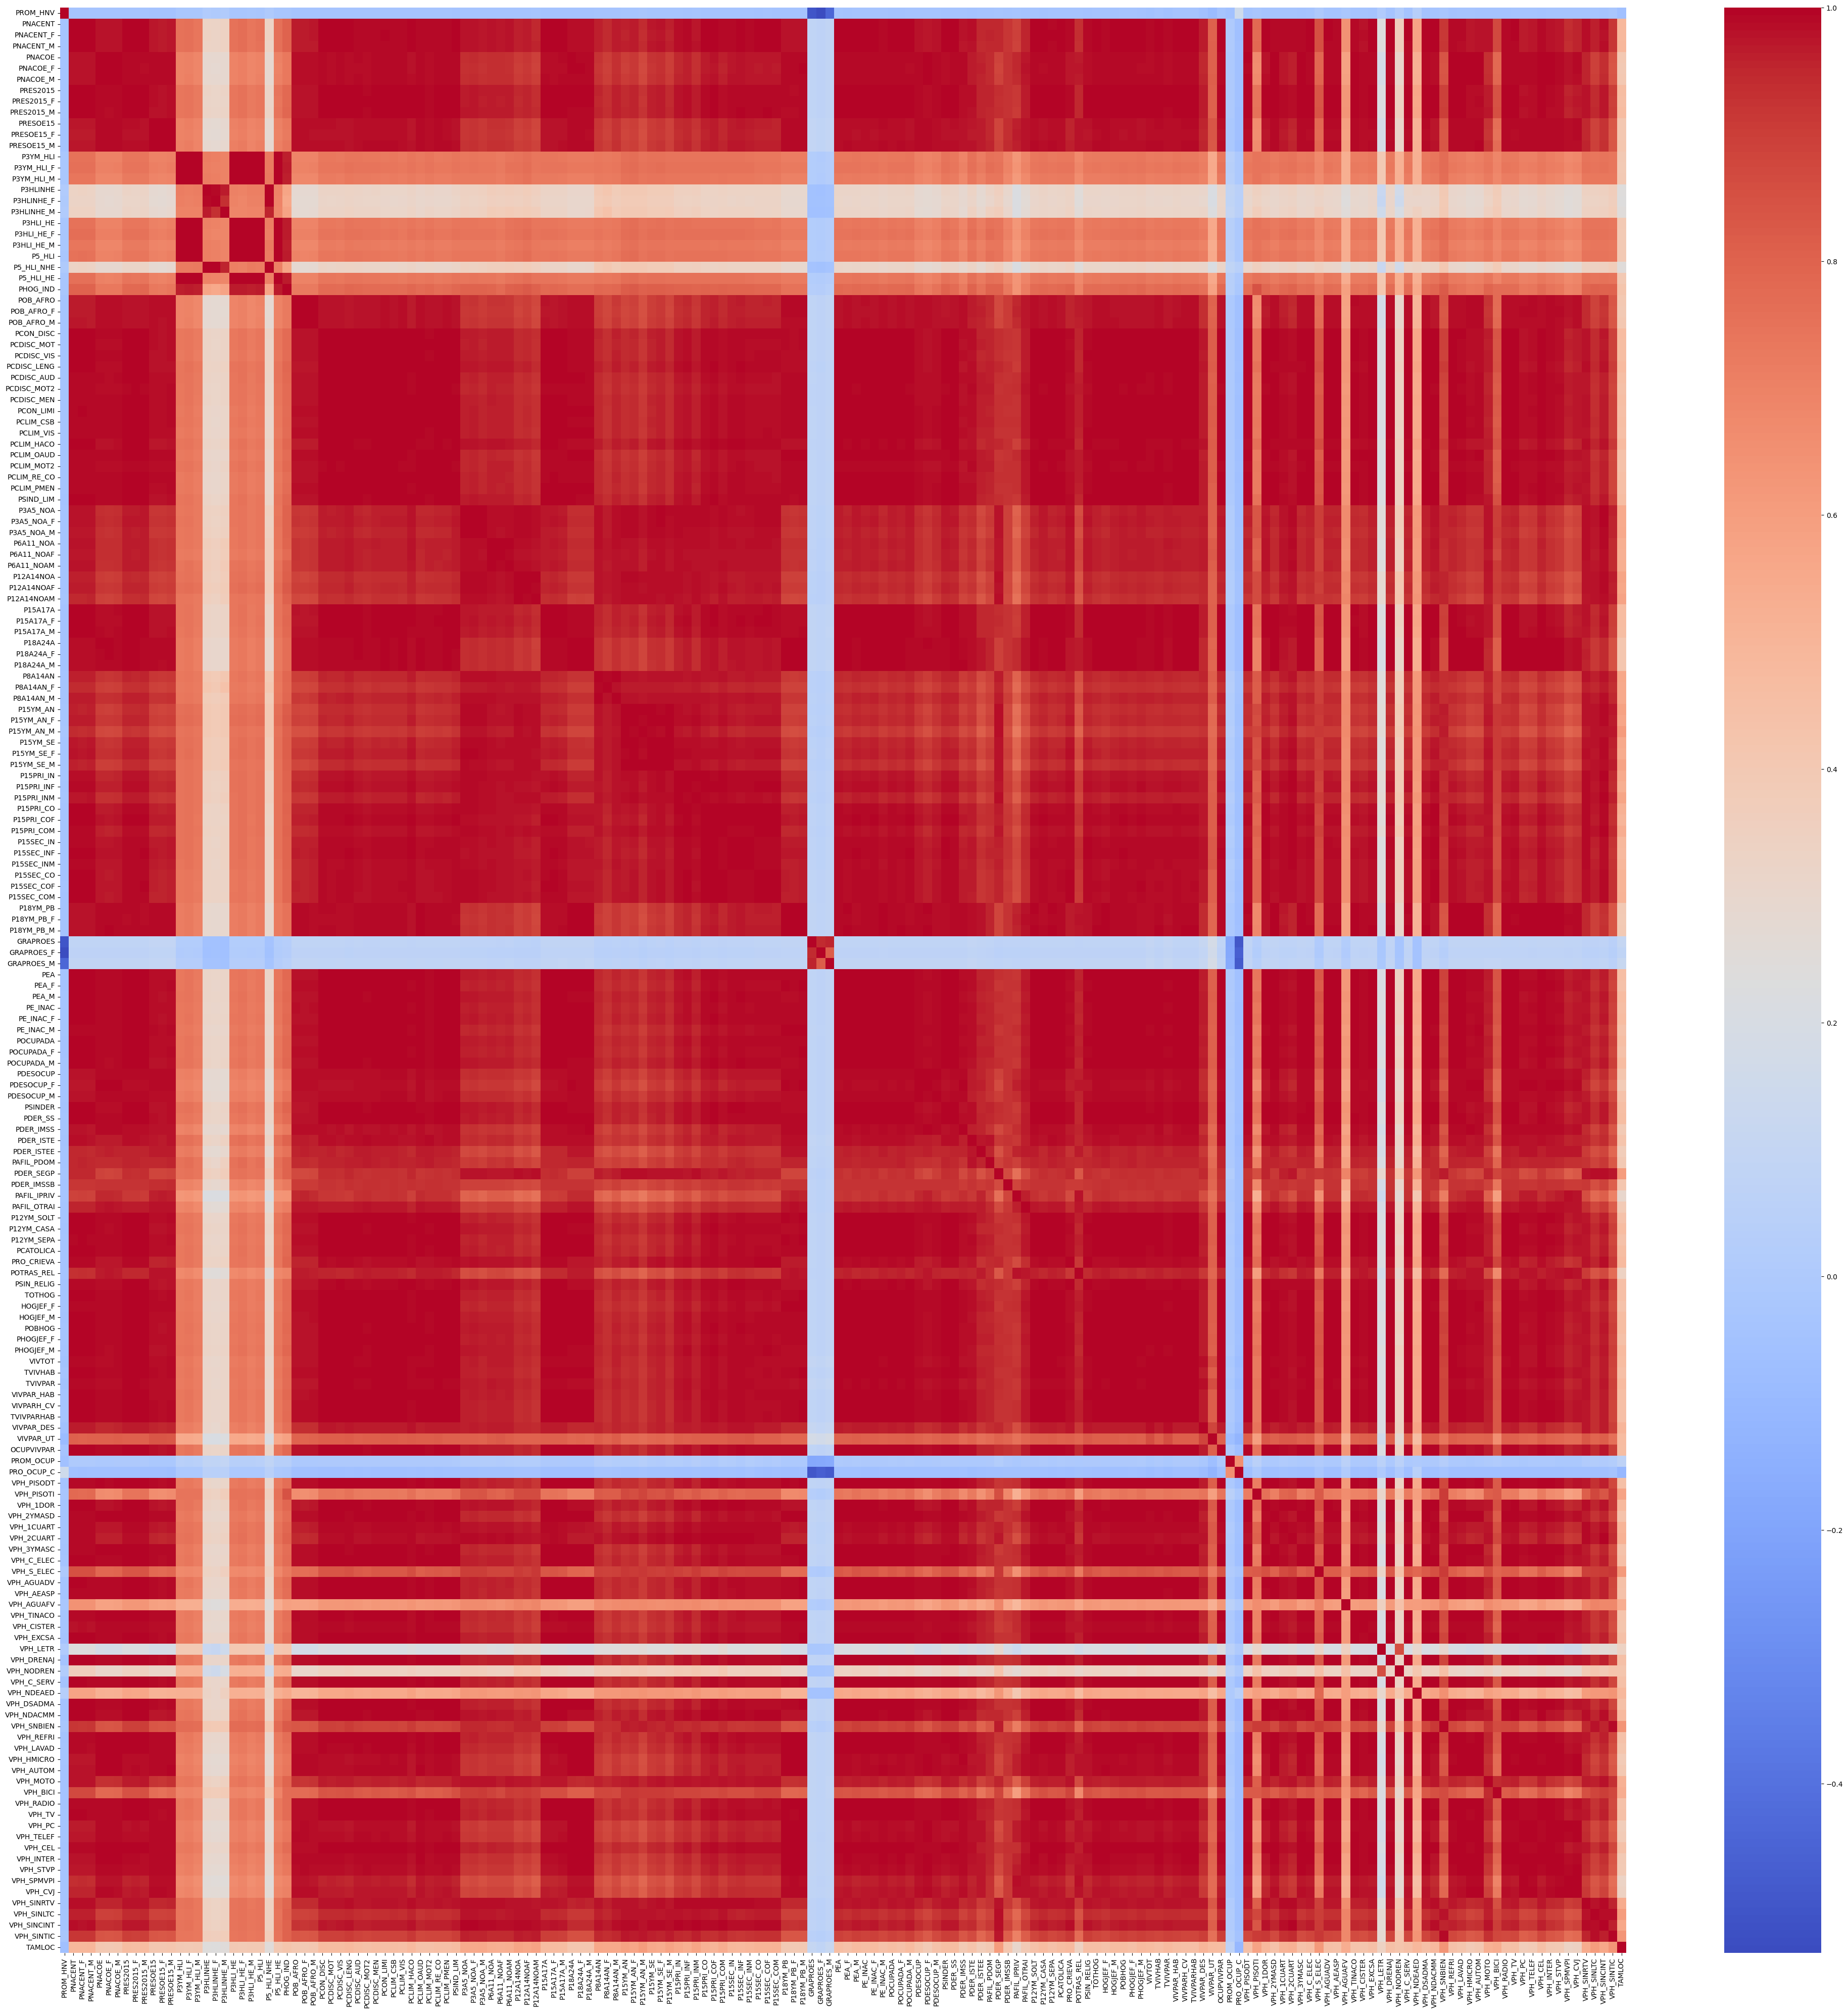

In [24]:
#Heatmap with the dataset filtered
plt.figure(figsize=(50,50))

sns.heatmap(corr, annot=False, cmap='coolwarm')

plt.show()


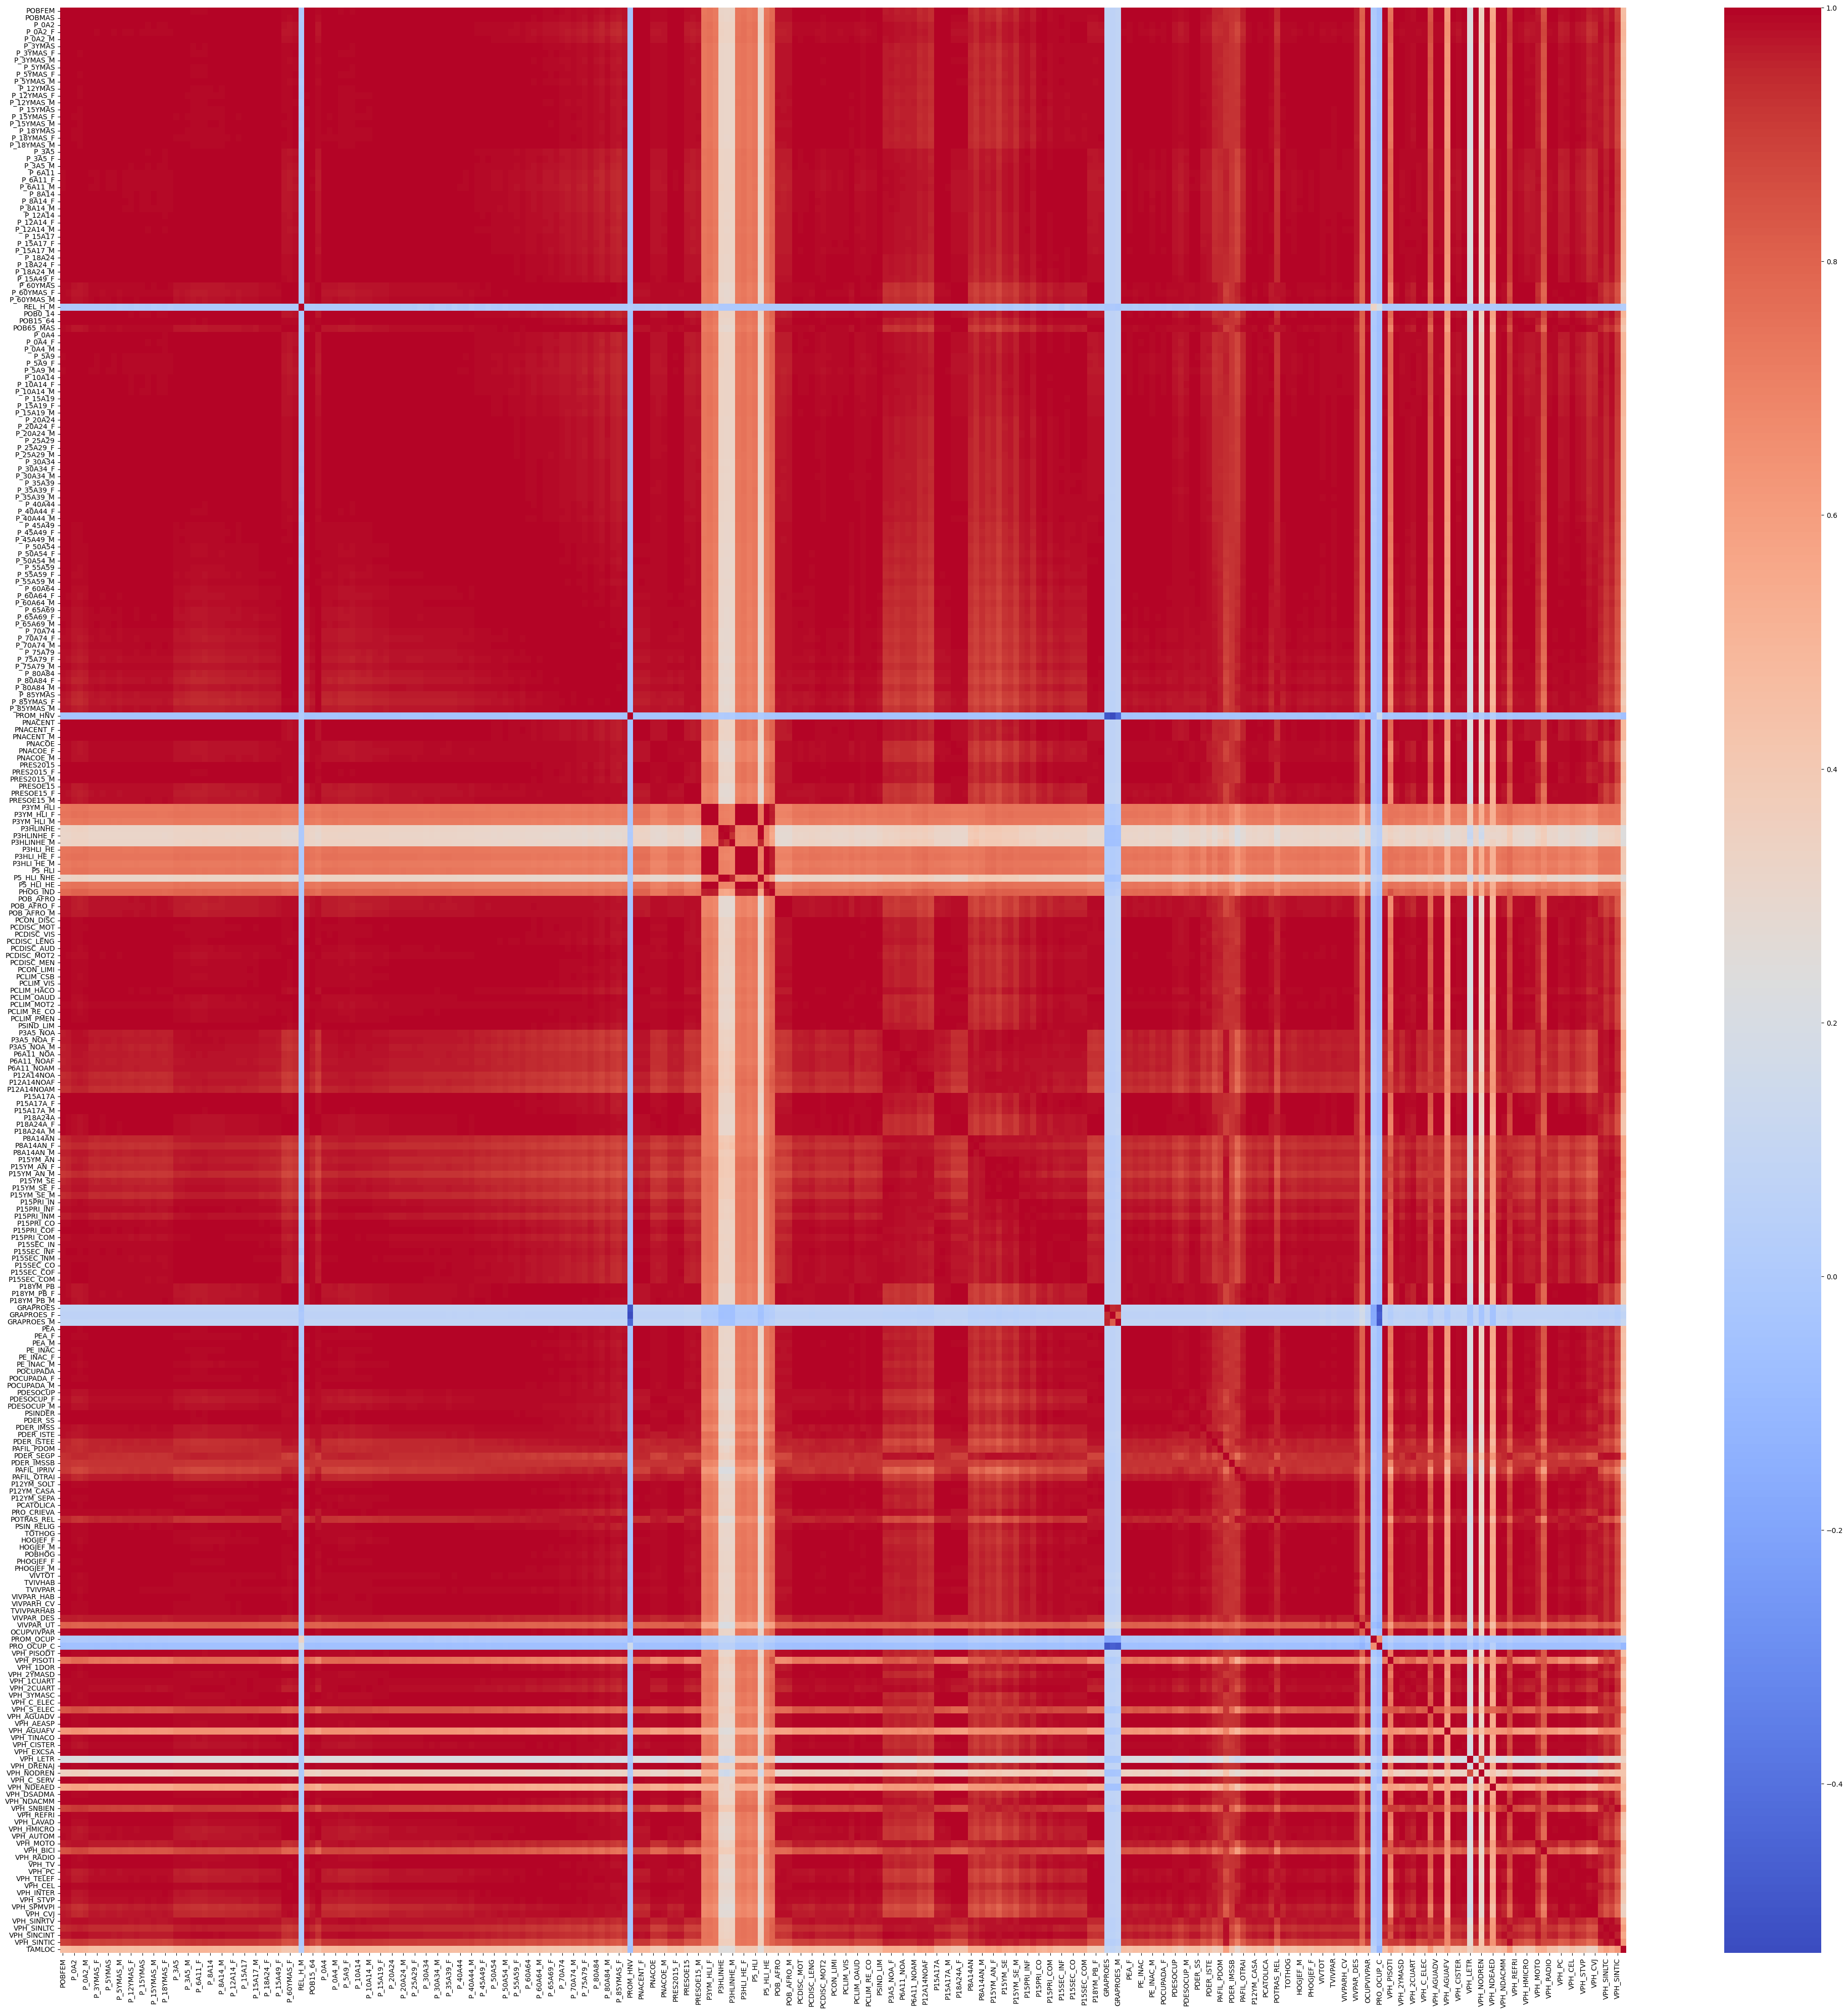

In [25]:
# Heatmap with the whole dataset
plt.figure(figsize=(50,50))

sns.heatmap(df_sub2_corr, annot=False, cmap='coolwarm')

plt.show()


#### Now checking for the variable considered towards all the other ones

In [26]:
correlation_variable_target = df_sub2.corr()["PSINDER"]
sorted_correlation = correlation_variable_target.sort_values(ascending=False)

sorted_correlation

PSINDER       1.000000
POCUPADA_M    0.998658
PEA_M         0.998595
P_35A39       0.998500
POBMAS        0.998498
                ...   
GRAPROES_F    0.070096
REL_H_M       0.012030
PROM_OCUP     0.005606
PROM_HNV     -0.042909
PRO_OCUP_C   -0.054913
Name: PSINDER, Length: 276, dtype: float64

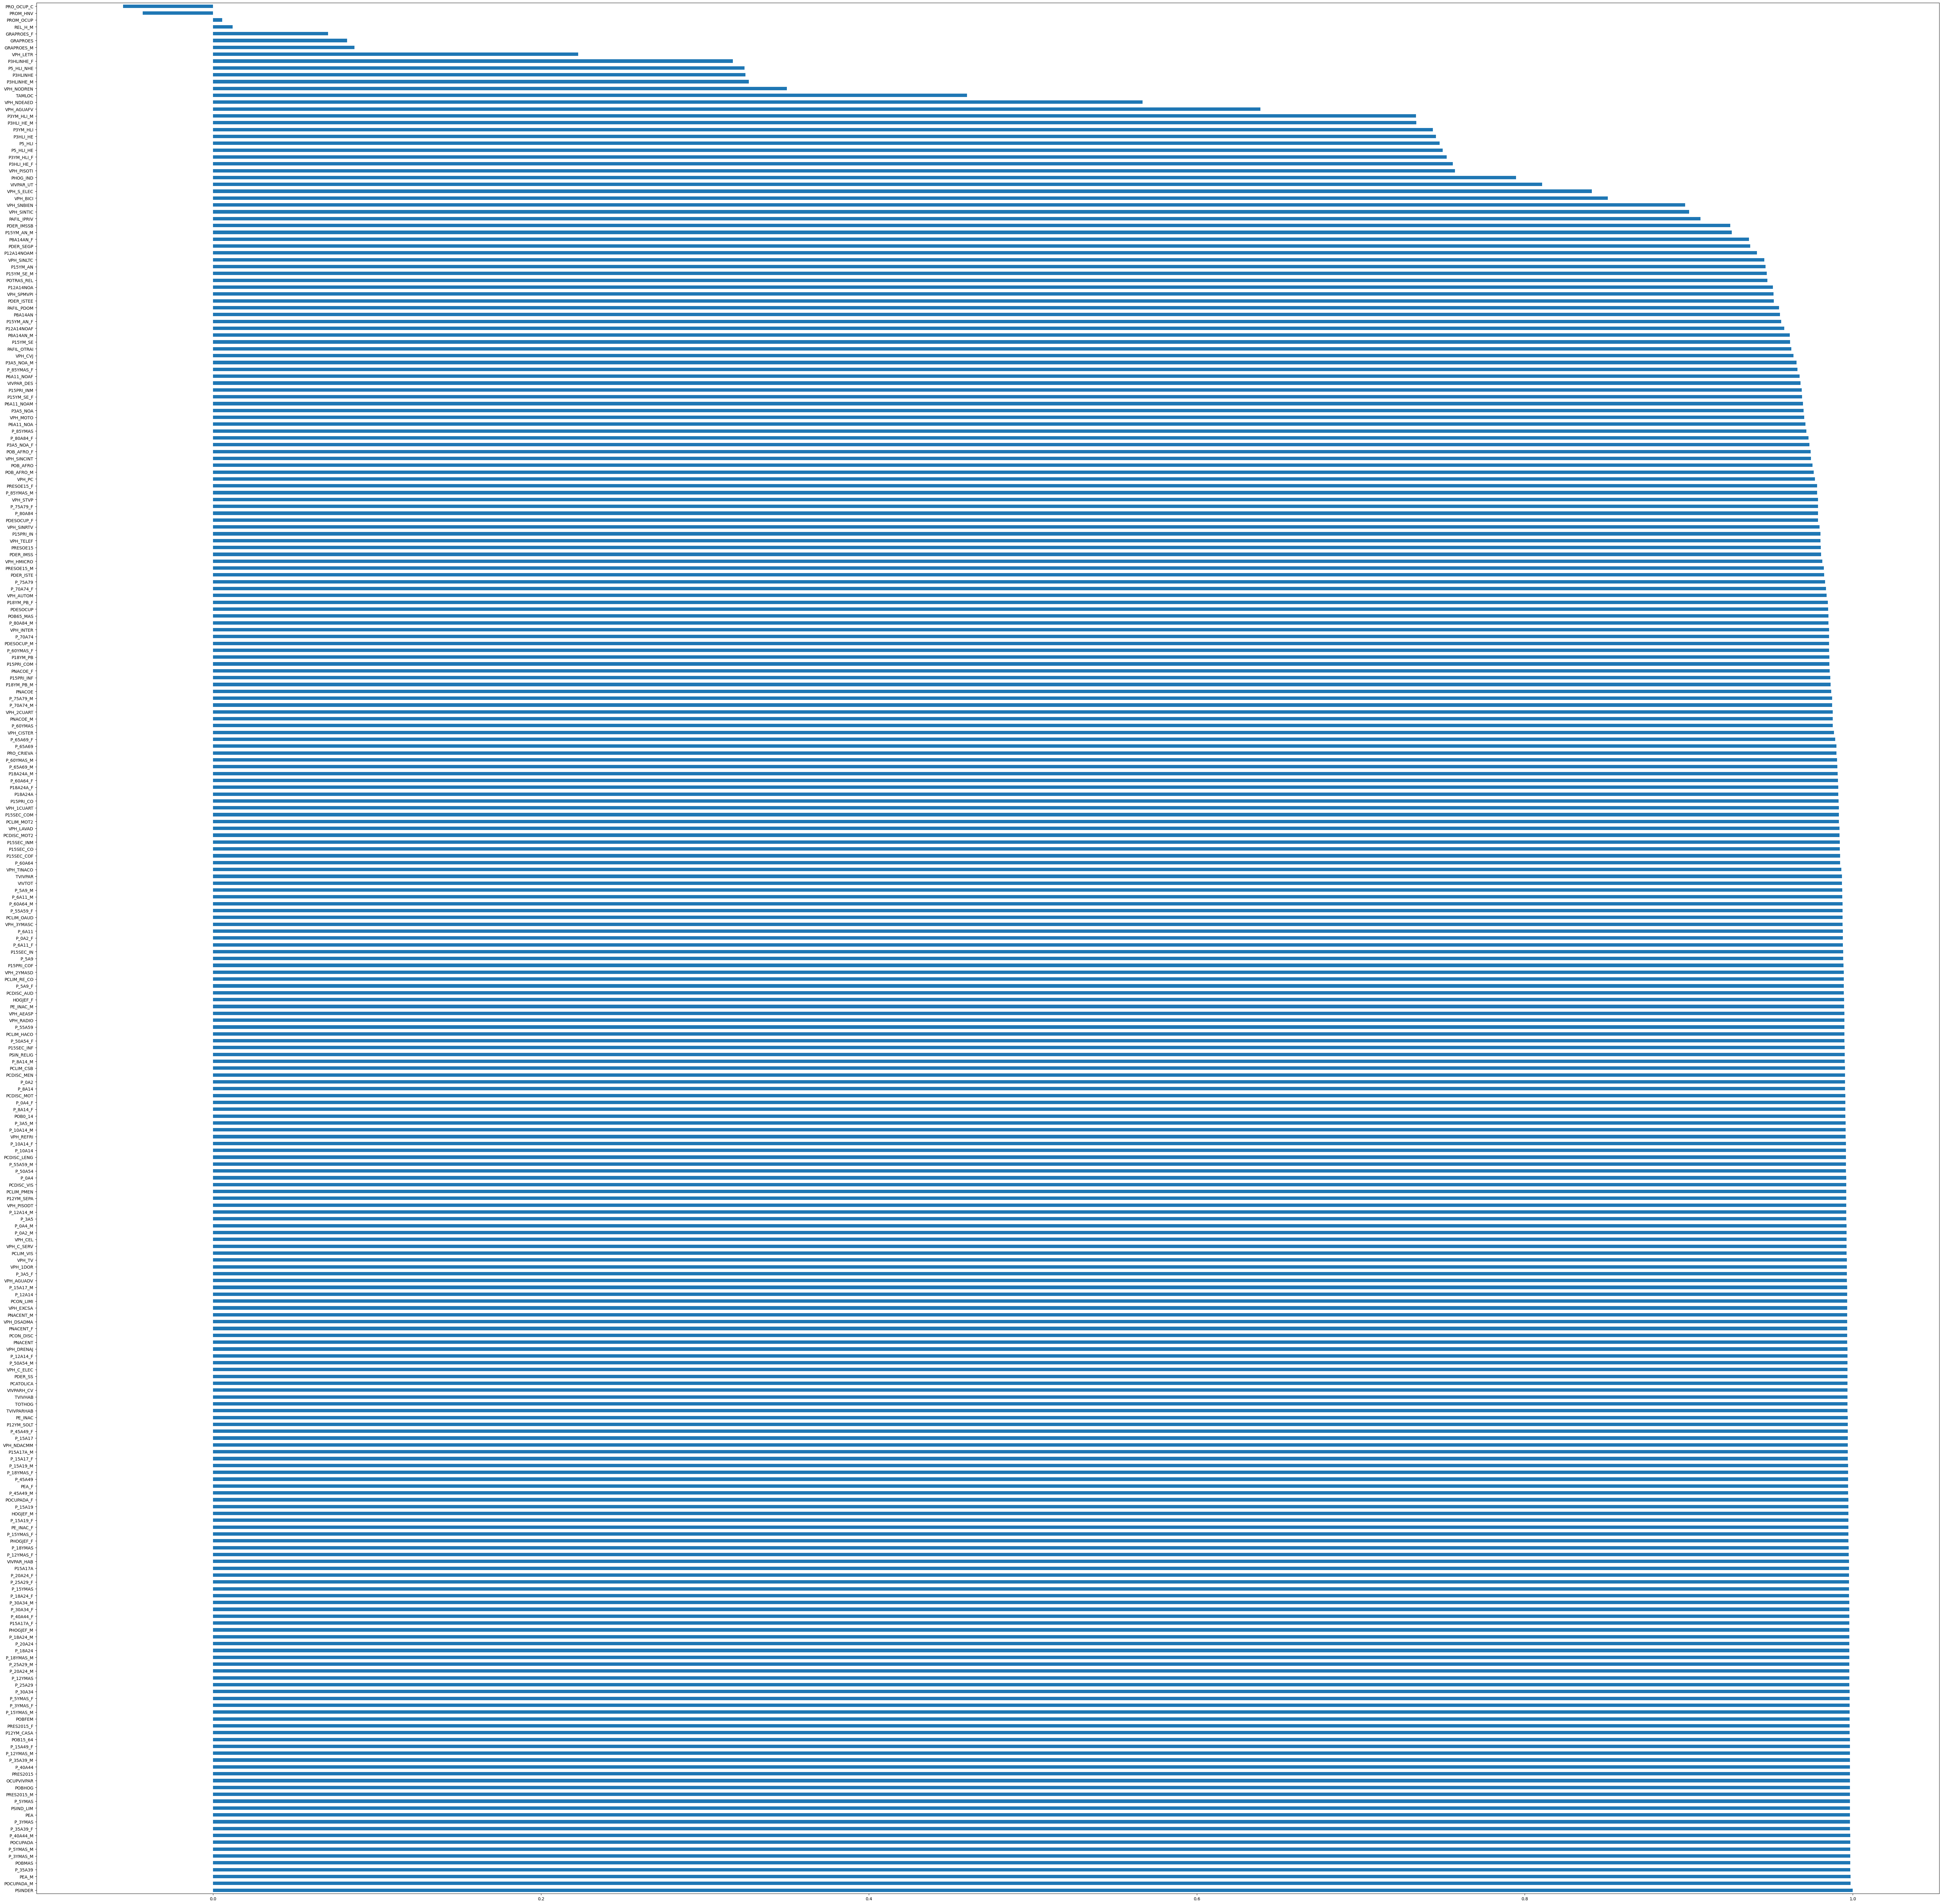

In [27]:
plt.figure(figsize=(80,80))

sorted_correlation.plot(kind='barh')

plt.show()


### As I check the dataset It seems that actually the variable PSINDER that is people with no health insurance has a lot of correlation with the other variables, either way I am going to iterate again on the first cleanse of nulls to check if there was an error

In [28]:
print("df with no nulls shape:", dfnonull.shape)
print("df with apparent nulls withouth dropping anythin (but * values):", df.shape)

df with no nulls shape: (1308, 286)
df with apparent nulls withouth dropping anythin (but * values): (1678, 286)


In [29]:
df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,17,Morelos,0,Total de la entidad Morelos,0,Total de la Entidad,NaN,NaN,NaN,1971520,...,499787.0,307830.0,222853.0,90825.0,48209.0,24696.0,34950.0,227132.0,7724.0,NaN
1,17,Morelos,0,Total de la entidad Morelos,9998,Localidades de una vivienda,NaN,NaN,NaN,1382,...,145.0,40.0,35.0,2.0,3.0,39.0,27.0,130.0,18.0,NaN
2,17,Morelos,0,Total de la entidad Morelos,9999,Localidades de dos viviendas,NaN,NaN,NaN,603,...,150.0,30.0,30.0,5.0,0.0,35.0,27.0,144.0,16.0,NaN
3,17,Morelos,1,Amacuzac,0,Total del Municipio,NaN,NaN,NaN,17598,...,4056.0,1919.0,1833.0,277.0,130.0,454.0,570.0,2895.0,175.0,NaN
4,17,Morelos,1,Amacuzac,1,Amacuzac,"99°22'10.251"" W","18°36'00.006"" N",900.0,5575,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0


In [30]:
dfnonull.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
4,17,Morelos,1,Amacuzac,1,Amacuzac,"99°22'10.251"" W","18°36'00.006"" N",900.0,5575,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0
5,17,Morelos,1,Amacuzac,2,Cajones,"99°20'48.128"" W","18°34'33.424"" N",894.0,553,...,122.0,39.0,27.0,3.0,3.0,21.0,19.0,104.0,8.0,3.0
6,17,Morelos,1,Amacuzac,3,Casahuatlán,"99°23'09.536"" W","18°34'24.213"" N",949.0,1915,...,400.0,123.0,72.0,5.0,4.0,67.0,66.0,365.0,19.0,4.0
7,17,Morelos,1,Amacuzac,4,Coahuixtla,"99°22'08.736"" W","18°34'26.698"" N",914.0,1151,...,238.0,99.0,61.0,3.0,3.0,29.0,39.0,200.0,11.0,4.0
8,17,Morelos,1,Amacuzac,5,Huajintlán,"99°25'27.001"" W","18°36'35.101"" N",926.0,1788,...,411.0,177.0,219.0,20.0,10.0,40.0,56.0,321.0,20.0,4.0


In [31]:
df_no_w = dfnonull.iloc[:,9:]
df_no_w

,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
4,5575,2925.0,2650.0,216.0,118.0,98.0,5359.0,2807.0,2552.0,5140.0,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0
5,553,275.0,278.0,31.0,15.0,16.0,522.0,260.0,262.0,501.0,...,122.0,39.0,27.0,3.0,3.0,21.0,19.0,104.0,8.0,3.0
6,1915,993.0,922.0,111.0,47.0,64.0,1804.0,946.0,858.0,1716.0,...,400.0,123.0,72.0,5.0,4.0,67.0,66.0,365.0,19.0,4.0
7,1151,592.0,559.0,52.0,21.0,31.0,1099.0,571.0,528.0,1051.0,...,238.0,99.0,61.0,3.0,3.0,29.0,39.0,200.0,11.0,4.0
8,1788,922.0,866.0,69.0,43.0,26.0,1719.0,879.0,840.0,1651.0,...,411.0,177.0,219.0,20.0,10.0,40.0,56.0,321.0,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,20,11.0,9.0,3.0,2.0,1.0,17.0,9.0,8.0,17.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
1669,30,14.0,16.0,2.0,1.0,1.0,28.0,13.0,15.0,26.0,...,11.0,1.0,1.0,1.0,0.0,4.0,2.0,11.0,2.0,1.0
1670,45,23.0,22.0,6.0,3.0,3.0,39.0,20.0,19.0,37.0,...,9.0,1.0,2.0,0.0,1.0,1.0,2.0,10.0,0.0,1.0
1671,78,38.0,40.0,5.0,1.0,4.0,73.0,37.0,36.0,72.0,...,15.0,2.0,7.0,0.0,0.0,3.0,4.0,17.0,0.0,1.0


### To see further information and get rid of the not used  I create a dimensionality reduction with the PCA technique (USING df_no_w)

Explained Variance Ratio: [0.90967633 0.02670953]


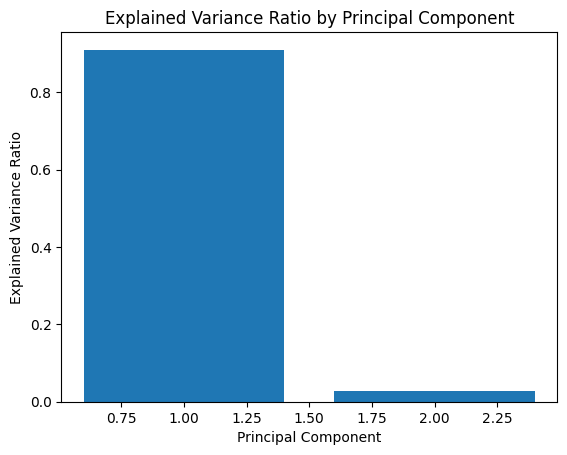

In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate your target variable (if applicable)
target = df_no_w['PSINDER']
df_no_w = df_no_w.drop(columns=['PSINDER'])

# Standardize your data (mean=0, variance=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_w)

# Create a PCA object with the desired number of components
n_components = 2  # You can adjust this number as needed
pca = PCA(n_components=n_components)

# Fit the PCA model to your scaled data
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Optional: If you want to see the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Optional: Visualize the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()



In [33]:
loadings = pca.components_
importance_levels = loadings.mean(axis=0) 
importance_df = pd.DataFrame({'Variable': df_no_w.columns, 'Importance': importance_levels})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the importance levels
importance_df.head(100)

,Variable,Importance
124,P5_HLI_NHE,0.152676
117,P3HLINHE,0.151482
119,P3HLINHE_M,0.149366
118,P3HLINHE_F,0.149277
116,P3YM_HLI_M,0.131924
...,...,...
140,PCLIM_HACO,0.030392
254,VPH_NDACMM,0.030047
228,VIVPAR_DES,0.029832
235,VPH_1DOR,0.029723


In [34]:
importance_threshold = 0.09 # Adjust this threshold as needed

# Identify less important variables
less_important_variables = df_no_w.columns[loadings.mean(axis=0) < importance_threshold]

# Drop less important variables from the DataFrame
df_filtered = df_no_w.drop(columns=less_important_variables)
df_filtered

,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,VPH_PISOTI
4,11.0,8.0,3.0,0.0,0.0,0.0,11.0,8.0,3.0,11.0,0.0,11.0,33.0,52.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
6,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,5.0,19.0,60.0
7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0
8,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,1.0
1669,12.0,4.0,8.0,0.0,0.0,0.0,12.0,4.0,8.0,12.0,0.0,12.0,14.0,2.0
1670,4.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,4.0,1.0,3.0,12.0,4.0
1671,35.0,16.0,19.0,0.0,0.0,0.0,35.0,16.0,19.0,35.0,0.0,35.0,70.0,4.0


In [35]:
# Recover the target column 
df_filtered['PSINDER'] = target

In [36]:
df_filtered

,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,VPH_PISOTI,PSINDER
4,11.0,8.0,3.0,0.0,0.0,0.0,11.0,8.0,3.0,11.0,0.0,11.0,33.0,52.0,1028.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,74.0
6,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,5.0,19.0,60.0,320.0
7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0,188.0
8,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,6.0,18.0,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,1.0,7.0
1669,12.0,4.0,8.0,0.0,0.0,0.0,12.0,4.0,8.0,12.0,0.0,12.0,14.0,2.0,19.0
1670,4.0,2.0,2.0,1.0,0.0,1.0,3.0,2.0,1.0,4.0,1.0,3.0,12.0,4.0,25.0
1671,35.0,16.0,19.0,0.0,0.0,0.0,35.0,16.0,19.0,35.0,0.0,35.0,70.0,4.0,45.0


In [37]:
corr_filtered = df_filtered.corr()
corr_filtered

,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,VPH_PISOTI,PSINDER
P3YM_HLI,1.000000,0.999385,0.999282,0.715422,0.708065,0.698670,0.999846,0.999059,0.999151,0.999930,0.722409,0.999655,0.963333,0.744952,0.743897
P3YM_HLI_F,0.999385,1.000000,0.997337,0.712188,0.704173,0.697039,0.999256,0.999733,0.997215,0.999393,0.718505,0.999158,0.964783,0.744682,0.752405
P3YM_HLI_M,0.999282,0.997337,1.000000,0.717927,0.711291,0.699466,0.999100,0.996949,0.999861,0.999127,0.725628,0.998809,0.960434,0.744214,0.733675
P3HLINHE,0.715422,0.712188,0.717927,1.000000,0.993558,0.968091,0.704652,0.696850,0.711887,0.708358,0.997861,0.698269,0.569129,0.353107,0.324692
P3HLINHE_F,0.708065,0.704173,0.711291,0.993558,1.000000,0.933454,0.697406,0.688486,0.705845,0.700838,0.995386,0.690753,0.553541,0.338592,0.316969
P3HLINHE_M,0.698670,0.697039,0.699466,0.968091,0.933454,1.000000,0.688150,0.683183,0.692390,0.692293,0.957276,0.682659,0.577329,0.368907,0.326784
P3HLI_HE,0.999846,0.999256,0.999100,0.704652,0.697406,0.688150,1.000000,0.999304,0.999209,0.999925,0.711934,0.999938,0.965965,0.749135,0.745832
P3HLI_HE_F,0.999059,0.999733,0.996949,0.696850,0.688486,0.683183,0.999304,1.000000,0.997029,0.999291,0.703387,0.999405,0.968799,0.751057,0.756064
P3HLI_HE_M,0.999151,0.997215,0.999861,0.711887,0.705845,0.692390,0.999209,0.997029,1.000000,0.999068,0.719952,0.998973,0.961462,0.745936,0.733782
P5_HLI,0.999930,0.999393,0.999127,0.708358,0.700838,0.692293,0.999925,0.999291,0.999068,1.000000,0.715442,0.999864,0.965987,0.749342,0.748139


### Trying correlation again to check if it worked

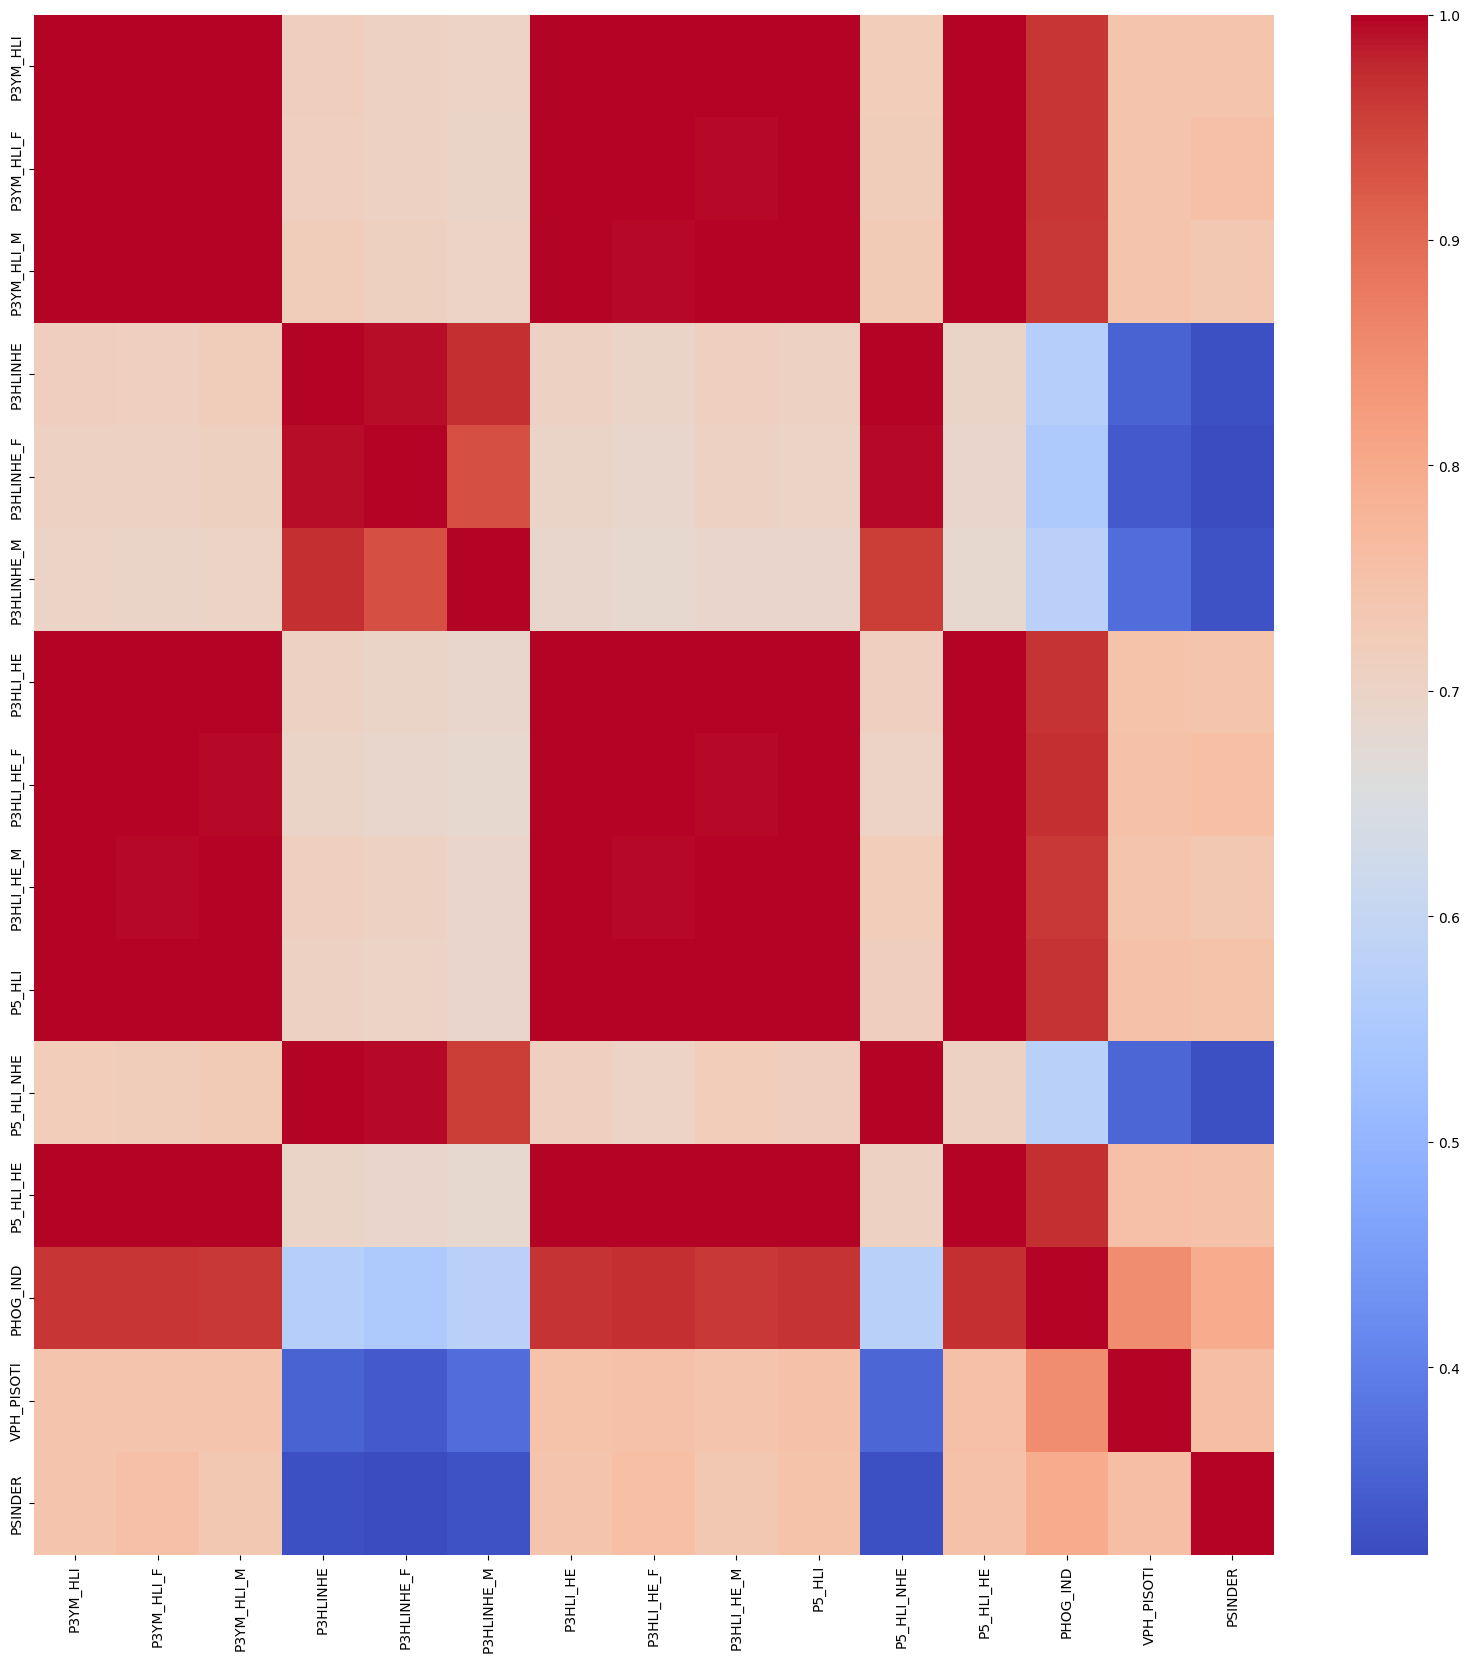

In [38]:
#Heatmap with the dataset filtered
plt.figure(figsize=(20,20))

sns.heatmap(corr_filtered, annot=False, cmap='coolwarm')

plt.show()

In [39]:
new_corr_target = df_filtered.corr()["PSINDER"]
sort_corr =new_corr_target.sort_values(ascending=False)

sort_corr

PSINDER       1.000000
PHOG_IND      0.794624
VPH_PISOTI    0.757340
P3HLI_HE_F    0.756064
P3YM_HLI_F    0.752405
P5_HLI_HE     0.749886
P5_HLI        0.748139
P3HLI_HE      0.745832
P3YM_HLI      0.743897
P3HLI_HE_M    0.733782
P3YM_HLI_M    0.733675
P3HLINHE_M    0.326784
P3HLINHE      0.324692
P5_HLI_NHE    0.324130
P3HLINHE_F    0.316969
Name: PSINDER, dtype: float64

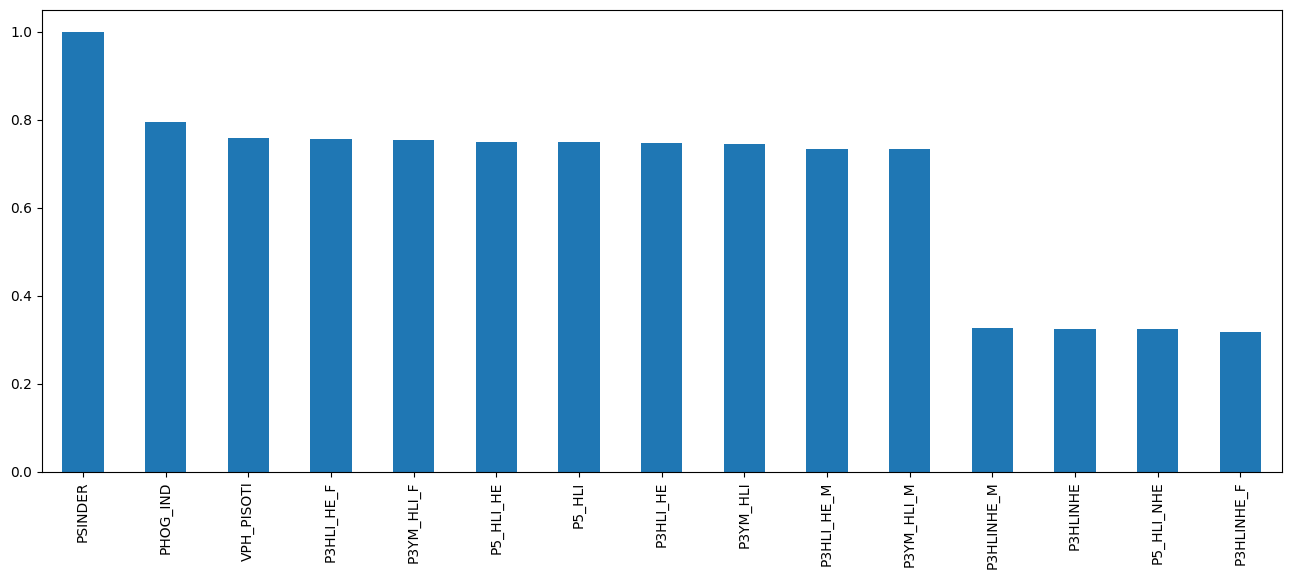

In [40]:
plt.figure(figsize=(16,6))

sort_corr.plot(kind='bar')

plt.show()


## Hopefully last iteration to clean correctly

In [41]:
df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,17,Morelos,0,Total de la entidad Morelos,0,Total de la Entidad,NaN,NaN,NaN,1971520,...,499787.0,307830.0,222853.0,90825.0,48209.0,24696.0,34950.0,227132.0,7724.0,NaN
1,17,Morelos,0,Total de la entidad Morelos,9998,Localidades de una vivienda,NaN,NaN,NaN,1382,...,145.0,40.0,35.0,2.0,3.0,39.0,27.0,130.0,18.0,NaN
2,17,Morelos,0,Total de la entidad Morelos,9999,Localidades de dos viviendas,NaN,NaN,NaN,603,...,150.0,30.0,30.0,5.0,0.0,35.0,27.0,144.0,16.0,NaN
3,17,Morelos,1,Amacuzac,0,Total del Municipio,NaN,NaN,NaN,17598,...,4056.0,1919.0,1833.0,277.0,130.0,454.0,570.0,2895.0,175.0,NaN
4,17,Morelos,1,Amacuzac,1,Amacuzac,"99°22'10.251"" W","18°36'00.006"" N",900.0,5575,...,1442.0,811.0,835.0,164.0,80.0,90.0,83.0,741.0,22.0,6.0


In [42]:
df.isnull().sum()

ENTIDAD          0
NOM_ENT          0
MUN              0
NOM_MUN          0
LOC              0
              ... 
VPH_SINRTV     285
VPH_SINLTC     285
VPH_SINCINT    285
VPH_SINTIC     285
TAMLOC         100
Length: 286, dtype: int64

In [43]:
df.dtypes

ENTIDAD          int64
NOM_ENT         object
MUN              int64
NOM_MUN         object
LOC              int64
                ...   
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
TAMLOC         float64
Length: 286, dtype: object

In [44]:
text_columns = df.select_dtypes(include=['object']).columns
for column in text_columns:
    df[column] = df[column].astype('category').cat.codes #convert to categorical data to numerical data

In [45]:
df.dtypes

ENTIDAD          int64
NOM_ENT           int8
MUN              int64
NOM_MUN           int8
LOC              int64
                ...   
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
TAMLOC         float64
Length: 286, dtype: object